<h1>Visualization with Python</h1>

Let us choose <b>matplotlib</b> as the base of our visualization package. Ignore other approaches that uses <b>matplotlib</b> as the base, such as the ploting functions in <b>pandas</b>, it can be constructed with a little effort based on matplotlib.


Reference<br>

reference https://matplotlib.org/stable/api/index.html

https://matplotlib.org/stable/contents.html

<a href="http://www.aosabook.org/en/matplotlib.html">How matplotlib works?</a>

https://matplotlib.org/stable/_modules/matplotlib/backends/backend_agg.html#RendererAgg.draw_path_collection

https://matplotlib.org/stable/api/artist_api.html?highlight=artist#module-matplotlib.artist

https://matplotlib.org/stable/api/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors
import sys
sys.path.append("../data/")
from mylib import *

The notation in plt maybe confusing for the beginner, sometimes it is so simple but sometimes it is so complicate. Such as 
    
    fig, ax = plt.subplots(figsize=(10,6))

It may be easier to understand if we write it slightly different

    canvas, painter = plt.subplots(figsize=(10,6))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

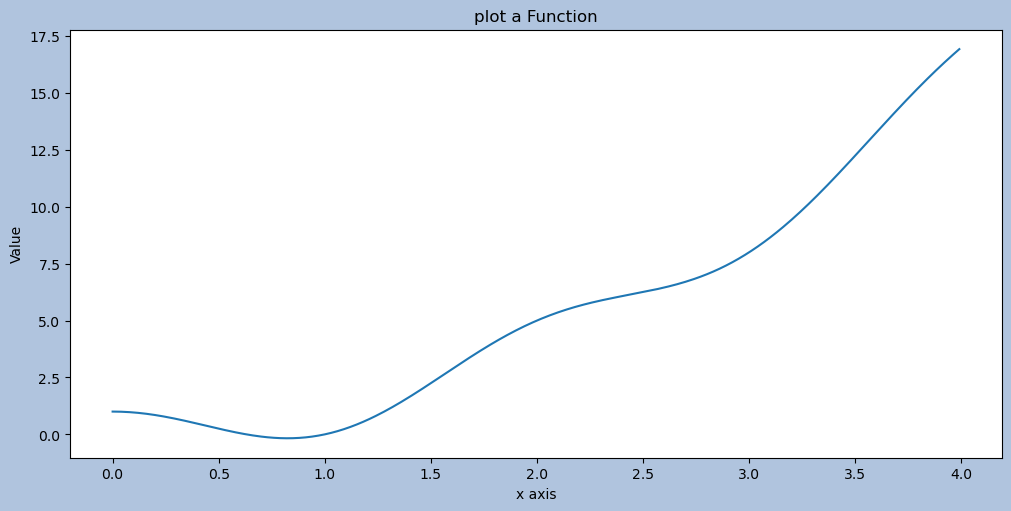

In [3]:
x = np.arange(0, 4, 0.01)
print(x)
y = np.cos(x*np.pi) + x**2

#fig 代表整个图的容器，ax 是子图（轴），在其中绘制实际的图形内容。
fig, ax = plt.subplots(figsize=(10,5), constrained_layout=True)
ax.plot(x, y)
ax.set_xlabel('x axis')
ax.set_ylabel('Value')
ax.set_title("plot a Function")
fig.set_facecolor('lightsteelblue')

Text(0.5, 1.0, 'Y and X')

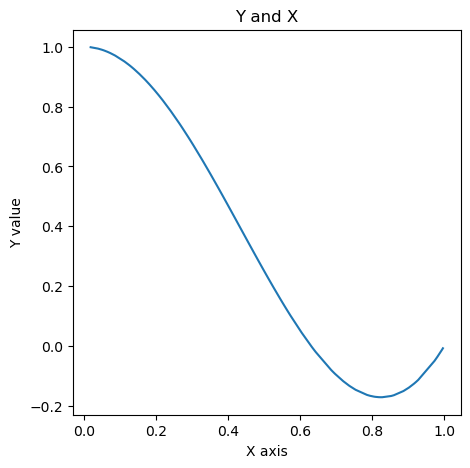

In [4]:
x = np.sort(np.random.uniform(0,1,100))
y = np.cos(x*np.pi) + x**2
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x, y)
ax.set_xlabel('X axis')
ax.set_ylabel('Y value')
ax.set_title("Y and X")

<h2>Why canvas (fig) matter </h2>

The algorithm for drawing a simple graphic object (such as a line segment) depends on many factors:
    <ul>
    <li>media: screen, paper, file
    <li>graphic settings: resolution, dpi, scaling
    <li>operation: copy, save, read, transform
    <li>quality: anti-aliasing, color space, transparent
    </ul>

draw a line with slope may look like a simple action, but up until 1980 the sloped-line means a step lines. 

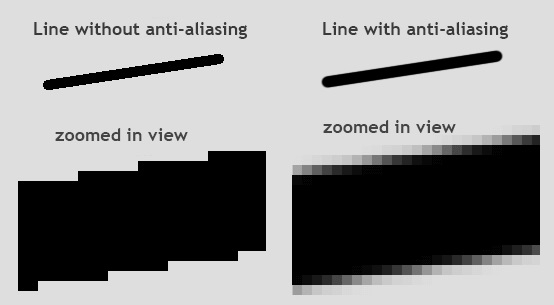

matplotlib's figure object provide an abstracted canvas and to hide all the low level pixel operation from the 'Painter' object

<h2>Artist ('painter') object</h2>

https://matplotlib.org/3.1.1/api/artist_api.html

In <b>matplotlib</b>'s documentation, the artist is the abstract base class for objects that render into a FigureCanvas.

Typically, all visible elements in a figure are subclasses of Artist. There are two types of Artists in the hierarchy. 
- Primitive artists represent the kinds of objects you see in a plot: Line2D, Rectangle, Circle, and Text. 
- Composite artists are collections of Artists such as the Axis, Tick, Axes, and Figure. 

Each composite artist may contain other composite artists as well as primitive artists. For example, the Figure contains one or more composite Axes and the background of the Figure is a primitive Rectangle.

The most important composite artist is the Axes, which is where most of the matplotlib API plotting methods are defined. Not only does the Axes contain most of the graphical elements that make up the background of the plot—the ticks, the axis lines, the grid, the patch of color which is the plot background—it contains numerous helper methods that create primitive artists and add them to the Axes instance.


<h2>what is behind the scene</h2>

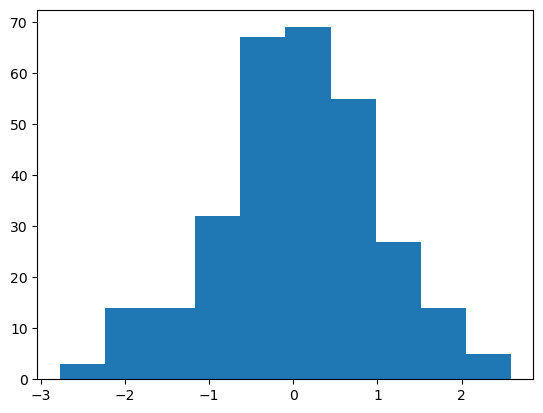

In [5]:
# a extremely simple plt code implyes a lot of action behind the scene
x = np.random.normal(size=300) #standard normal distribution.

plt.hist(x,bins=10)
plt.show()

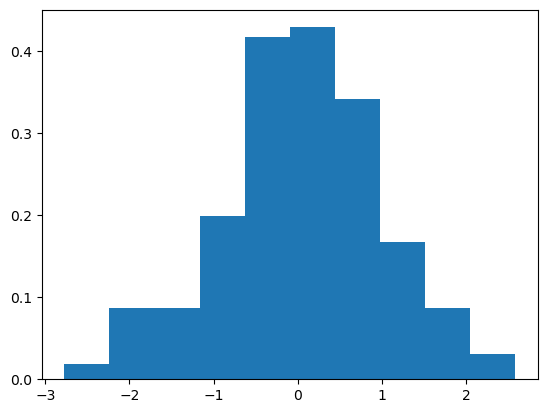

In [6]:
plt.hist(x,bins=10,density=True)
plt.show()

In [10]:
# let us check what is being called in such a simple code
sprint(plt)
sprint(plt.hist)
help(sprint)

<<<<<<<< module'.py >>>>>>>>

The source file of type class can not be located
<<<<<<<< END >>>>>>>>
@_copy_docstring_and_deprecators(Axes.hist)
def hist(
    x: ArrayLike | Sequence[ArrayLike],
    bins: int | Sequence[float] | str | None = None,
    range: tuple[float, float] | None = None,
    density: bool = False,
    weights: ArrayLike | None = None,
    cumulative: bool | float = False,
    bottom: ArrayLike | float | None = None,
    histtype: Literal["bar", "barstacked", "step", "stepfilled"] = "bar",
    align: Literal["left", "mid", "right"] = "mid",
    orientation: Literal["vertical", "horizontal"] = "vertical",
    rwidth: float | None = None,
    log: bool = False,
    color: ColorType | Sequence[ColorType] | None = None,
    label: str | Sequence[str] | None = None,
    stacked: bool = False,
    *,
    data=None,
    **kwargs,
) -> tuple[
    np.ndarray | list[np.ndarray],
    np.ndarray,
    BarContainer | Polygon | list[BarContainer | Polygon],
]:
    return gca().hi

In [11]:
# it passes the information to object gca(), which is can be seen by 
sprint(plt.gca)

@_copy_docstring_and_deprecators(Figure.gca)
def gca() -> Axes:
    return gcf().gca()
<<<<<<<< END >>>>>>>>


In [12]:
sprint(plt.gcf)

def gcf() -> Figure:
    """
    Get the current figure.

    If there is currently no figure on the pyplot figure stack, a new one is
    created using `~.pyplot.figure()`.  (To test whether there is currently a
    figure on the pyplot figure stack, check whether `~.pyplot.get_fignums()`
    is empty.)
    """
    manager = _pylab_helpers.Gcf.get_active()
    if manager is not None:
        return manager.canvas.figure
    else:
        return figure()
<<<<<<<< END >>>>>>>>


In [13]:
help(plt.gcf)

Help on function gcf in module matplotlib.pyplot:

gcf() -> 'Figure'
    Get the current figure.

    If there is currently no figure on the pyplot figure stack, a new one is
    created using `~.pyplot.figure()`.  (To test whether there is currently a
    figure on the pyplot figure stack, check whether `~.pyplot.get_fignums()`
    is empty.)



<h2>Basic plotting</h2>

In [14]:
def makeData(n):
    x = np.random.normal(size=n)
    y = np.random.normal(size=n)
    return x*5,-(x*x*3+3*y) 

x,y= makeData(1000)

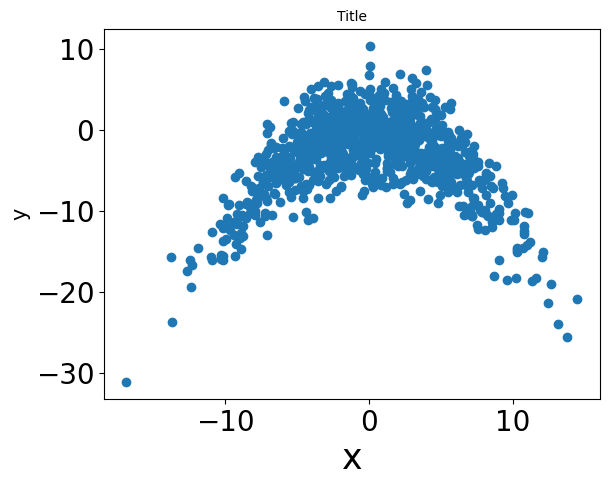

In [15]:
# scatter plot
plt.scatter(x,y)
plt.title('Title',fontsize=10)
plt.xlabel('x',fontsize=25)
plt.ylabel('y',fontsize=15)
plt.tick_params(axis='both',labelsize=20)

#axis='both'：指定要应用设置的坐标轴。
#'both' 表示同时对 x 和 y 轴的刻度进行设置。
#其他可选值：
#'x'：仅应用于 x 轴。
#'y'：仅应用于 y 轴。
#labelsize=20：指定刻度标签的字体大小。

#plt.show()

In [16]:
sprint(plt.tick_params)

@_copy_docstring_and_deprecators(Axes.tick_params)
def tick_params(axis: Literal["both", "x", "y"] = "both", **kwargs) -> None:
    gca().tick_params(axis=axis, **kwargs)
<<<<<<<< END >>>>>>>>


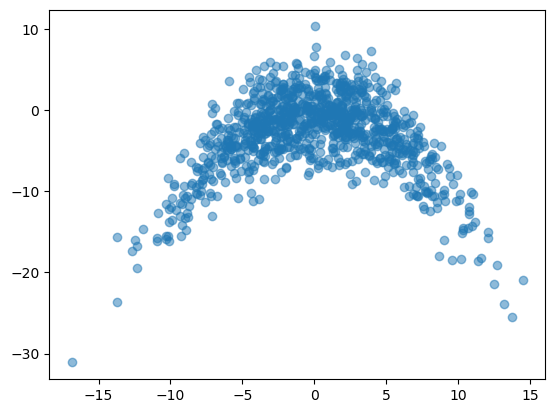

In [17]:
plt.scatter(x,y, alpha=.5)
plt.show()

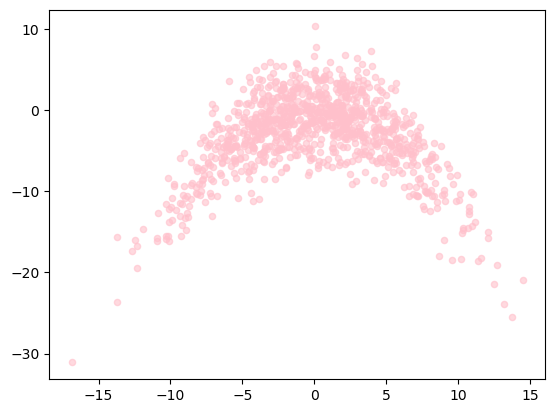

In [18]:
plt.scatter(x,y, color='pink', s=20, alpha=0.6)
plt.show()

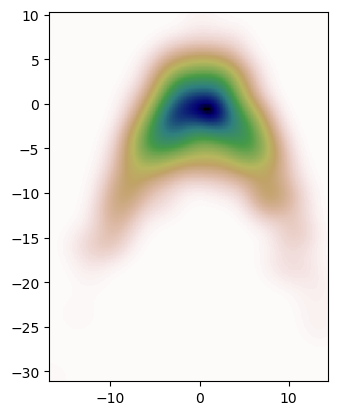

[[7.63384996e-20 3.14241483e-19 1.24232103e-18 ... 3.08798042e-14
  8.80693882e-15 2.43222980e-15]
 [2.44242358e-19 1.00348553e-18 3.95965257e-18 ... 5.93198983e-14
  1.73988682e-14 4.95692568e-15]
 [7.29734059e-19 2.99119139e-18 1.17766162e-17 ... 1.17233814e-13
  3.56045277e-14 1.05165847e-14]
 ...
 [5.67363056e-05 5.56715872e-05 5.24257202e-05 ... 6.40281654e-07
  6.14146500e-07 5.65412486e-07]
 [6.32487924e-05 6.20113824e-05 5.83481567e-05 ... 2.70336134e-07
  2.59197835e-07 2.38527052e-07]
 [6.55817528e-05 6.42467774e-05 6.04026168e-05 ... 1.06296847e-07
  1.01866622e-07 9.36940634e-08]]


In [19]:
# contour
from scipy import stats

X,Y=x,y
xmin = X.min()
xmax = X.max()
ymin = Y.min()
ymax = Y.max()

Xs, Ys = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
#生成一个二维网格，用于评估核密度估计。
#100j 表示在每个维度上生成 100 个点，形成一个 100x100 的网格。
#Xs 和 Ys 是网格的 x 和 y 坐标。
positions = np.vstack([Xs.ravel(), Ys.ravel()])
values = np.vstack([X, Y])
kernel = stats.gaussian_kde(values)
#使用 scipy.stats.gaussian_kde 创建一个二维的高斯核密度估计对象 kernel，基于 values 中的数据。
Z = np.reshape(kernel(positions).T, Xs.shape)
#kernel(positions)：计算网格上每个点的密度估计值。
#np.reshape(..., Xs.shape)：将计算出的密度值重新调整为 Xs 的形状 (100x100)，形成二维的密度估计矩阵 Z。

fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
# np.rot90(Z)：旋转 Z 矩阵 90 度，使其在坐标轴上显示正确的方向。
# cmap=plt.cm.gist_earth_r：使用颜色映射 gist_earth_r，提供地球颜色风格的反转效果。
# extent=[xmin, xmax, ymin, ymax]：设置显示范围，使密度图的边界与数据范围一致。
ax.plot(X, Y, 'k.', markersize=0.0) #marker size = 0 隐藏数据点的显示
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()
print(np.rot90(Z))

In [20]:
a,b=np.mgrid[0:1:3j, 0:2:3j]
print(a)
print(b)
np.vstack([a.ravel(),b.ravel()] )

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
[[0. 1. 2.]
 [0. 1. 2.]
 [0. 1. 2.]]


array([[0. , 0. , 0. , 0.5, 0.5, 0.5, 1. , 1. , 1. ],
       [0. , 1. , 2. , 0. , 1. , 2. , 0. , 1. , 2. ]])

In [21]:
for i in zip(a.ravel(),b.ravel()):
    print(i)

(0.0, 0.0)
(0.0, 1.0)
(0.0, 2.0)
(0.5, 0.0)
(0.5, 1.0)
(0.5, 2.0)
(1.0, 0.0)
(1.0, 1.0)
(1.0, 2.0)


In [22]:
a.shape

(3, 3)

<h3>Color</h3>

https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.to_rgba.html#matplotlib.colors.to_rgba

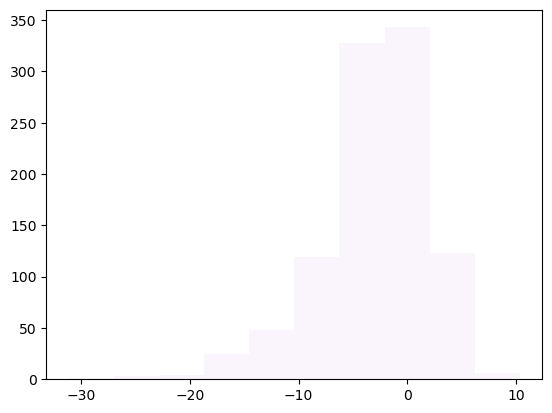

In [23]:
import random
r = random.random() #0.0 到 1.0 之间的随机浮点数（不包含 1.0）。这个数是从均匀分布中随机选取的，在该范围内每个数出现的概率是相同的。
g = random.random()
b = random.random()
a = random.random()

_=plt.hist(y, color=(r,g,b,a)) #The alpha value represents the level of transparency/opacity of the color
#(r, g, b, a) 是一个包含 4 个元素的元组，表示颜色的 RGBA 值。
#r、g、b：分别表示红、绿、蓝色的强度，取值范围为 0 到 1。例如，(1, 0, 0, a) 表示红色。
#a：表示透明度（alpha 通道），取值范围为 0 到 1。0 表示完全透明，1 表示完全不透明。

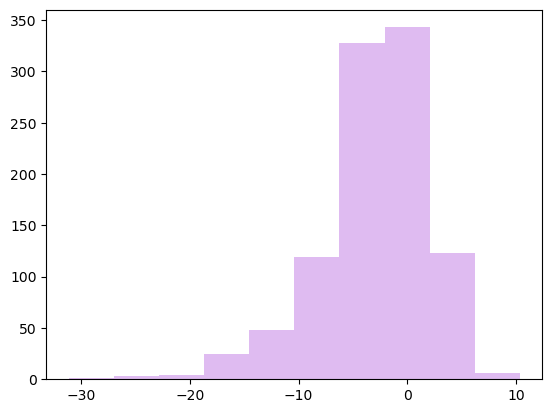

In [24]:
_=plt.hist(y, color=(r,g,b,0.3))

In [25]:
type(mcolors.to_rgba((r,g,b,a)))

tuple

A Random color is : #AB2152


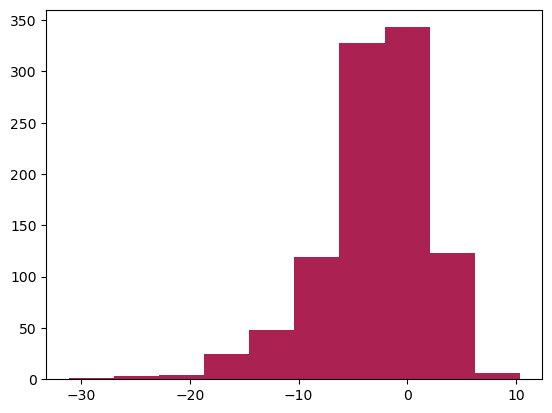

In [28]:
# The hexadecimal number system, also called base-16.
# https://www.webfx.com/blog/web-design/rgba/
import random
hexadecimal = "#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])
print("A Random color is :",hexadecimal)

_=plt.hist(y, color=hexadecimal)

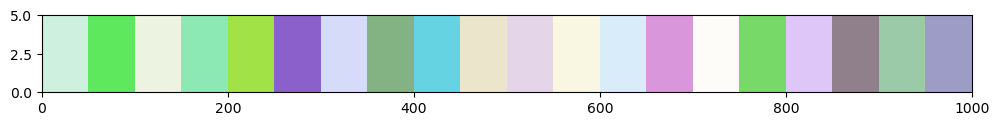

In [29]:
# Patches are Artists with a face color and an edge color.
#  https://matplotlib.org/stable/api/patches_api.html

import matplotlib.patches as patches
width=1000
ncolors=20
boxwidth=int(width/ncolors)
#计算每个矩形块的宽度。将总宽度 width 平均分为 ncolors 块，每个块的宽度为 1000 / 20 = 50 个单位。
fig, ax=plt.subplots(figsize=(12,1))
ax.set_xlim([0, width])
ax.set_ylim([0, 5])
for x in range(0,width,boxwidth):
    r = random.random()
    g = random.random()
    b = random.random()
    a = random.random()
    # https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html
    rect = patches.Rectangle((x,0), boxwidth, 5.0, linewidth=10, 
                             edgecolor='None', facecolor=mcolors.to_rgba((r,g,b,a)))
    
#patches.Rectangle((x, 0), boxwidth, 5.0, linewidth=10, edgecolor='None', facecolor=mcolors.to_rgba((r, g, b, a)))：
#Rectangle((x, 0), boxwidth, 5.0)：创建一个矩形块，左下角位置为 (x, 0)，宽度为 boxwidth（50），高度为 5。
#linewidth=10：设置矩形的边框宽度。
#edgecolor='None'：设置矩形的边框颜色为无。
#facecolor=mcolors.to_rgba((r, g, b, a))：将 (r, g, b, a) 值转化为 RGBA 颜色格式，填充为矩形的颜色。
    ax.add_patch(rect)
plt.show()

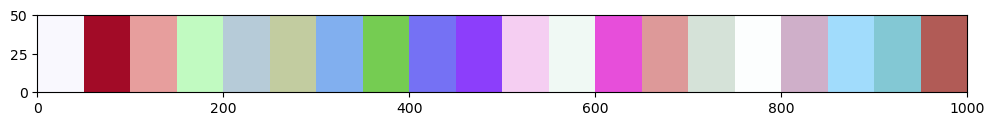

In [33]:
import matplotlib.patches as patches

# rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='lightgreen', facecolor='none')
# ax.add_patch(rect)
ncolors=20
colors=[]
for i in range(ncolors):
    r = random.random()
    g = random.random()
    b = random.random()
    a = random.random()
    colors.append(mcolors.to_rgba((r,g,b,a)))
    #print((r,g,b,a),mcolors.to_rgba((r,g,b,a)))
    
width=1000
boxsize=int(width/ncolors)
fig, ax=plt.subplots(figsize=(12,1))
ax.set_xlim([0, width])
ax.set_ylim([0, boxsize])
for i in range(ncolors):
    rect = patches.Rectangle((i*boxsize,0), boxsize, boxsize, linewidth=1, 
                             edgecolor='None', facecolor=colors[i])
    ax.add_patch(rect)
plt.show()

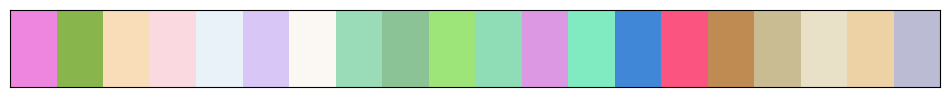

In [31]:
def showColors(colors):
    width=1000
    ncolors=len(colors)
    boxsize=int(width/ncolors)
    fig, ax=plt.subplots(figsize=(12,1))
    ax.set_xlim([0, width])
    ax.set_ylim([0, boxsize])
    ax.set_yticks([])
    ax.set_xticks([]) #将 x 轴的刻度设置为空列表 []，即移除所有 x 轴的刻度。
    for i in range(ncolors):
        rect = patches.Rectangle((i*boxsize,0), boxsize, boxsize, linewidth=0, facecolor=colors[i])
        ax.add_patch(rect)
    plt.show()
    
showColors(colors)

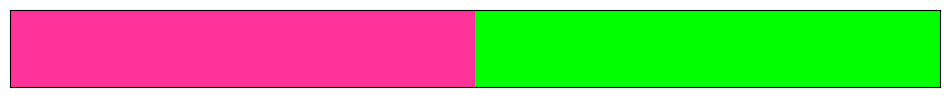

In [34]:
brightred=mcolors.to_rgba((1,0.2,0.6))
darkred=mcolors.to_rgba((0.,1,0))
showColors([brightred, darkred])


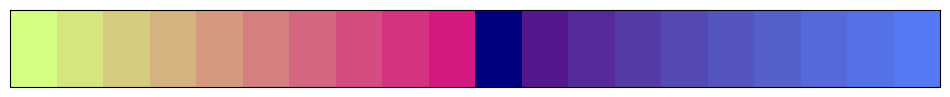

In [35]:
ncolors=20
colors=[]
for i in range(0,20,1):
    x=i/20
    colors.append(mcolors.rgb_to_hsv((0.5,x,0.5)))
# rgb_to_hsv 是 matplotlib.colors 提供的一个函数，用于将 RGB 颜色转换为 HSV 颜色空间。
# RGB（红、绿、蓝）颜色空间适合用于显示，而 HSV（色调、饱和度、明度）颜色空间适合用于颜色调整和图像处理。
showColors(colors)

In [36]:
mcolors.rgb_to_hsv((1,1,x))

array([0.16666667, 0.05      , 1.        ])

<h3>Color schemes</h3>

<ul>
<li>Sequential palette
<li>Diverging palette
<li>Discrete vs. continuous palette
<li>Avoid unnecessary usage of color
<li>Be consistent with color across charts
<li>Leverage meaningfulness of color
<li>Attend to color blindness
</ul>

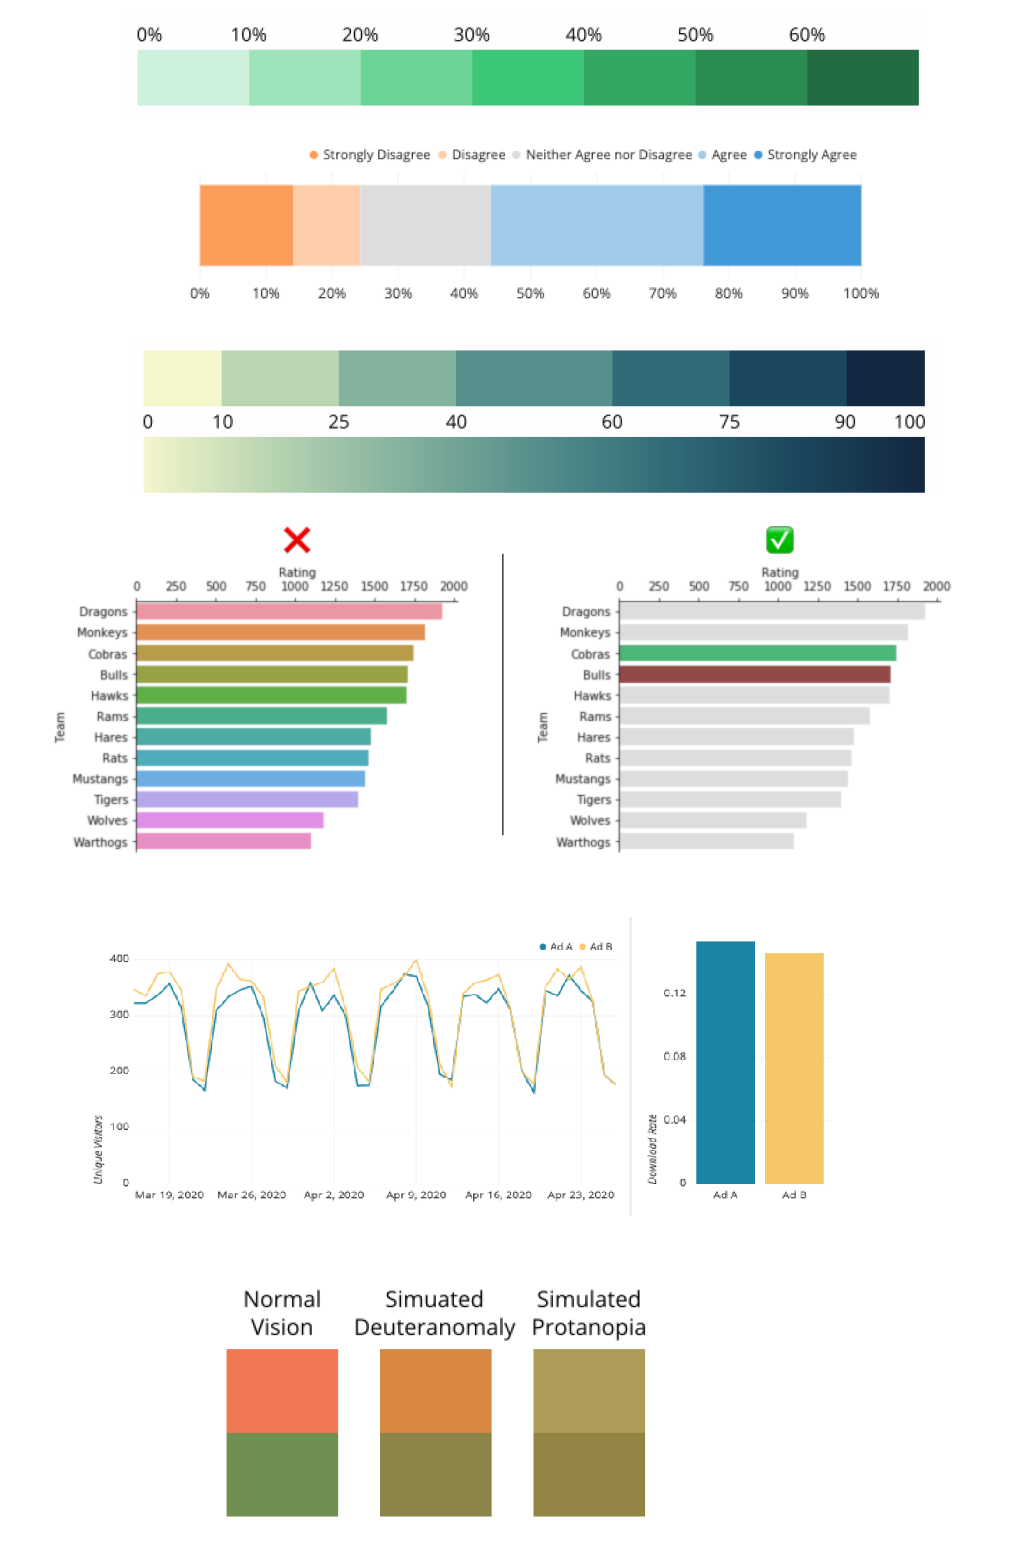

<a href="How to Choose Colors for Data Visualizations.pdf">How to Choose Colors for Data Visualizations</a>

<h2>Learning by example</h2>

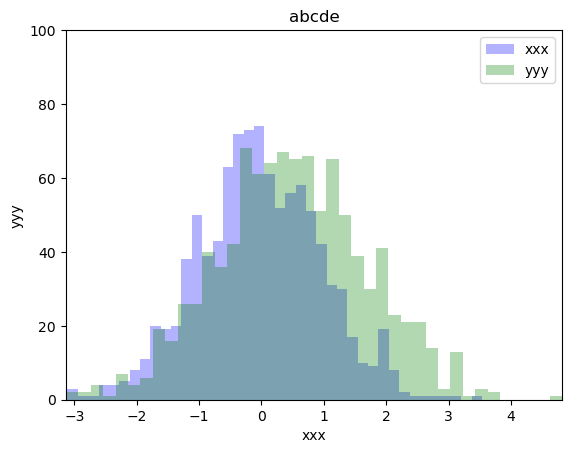

In [40]:
n = 1000
x = np.random.normal(0,1,size=n)
y = np.random.normal(0.5,1.2,size=n)
plt.hist(x,bins=40, color='b', alpha=0.3)
plt.hist(y,bins=40, color='green', alpha=0.3)

ax=plt.gca()
ax.set_xlabel("xxx")
ax.set_ylabel("yyy")
ax.set_xlim([min([x.min(),y.min()]), max([x.max(),y.max()])])
ax.set_ylim(0.0, 100)
ax.legend(['xxx','yyy'])
ax.set_title("abcde")
plt.show()

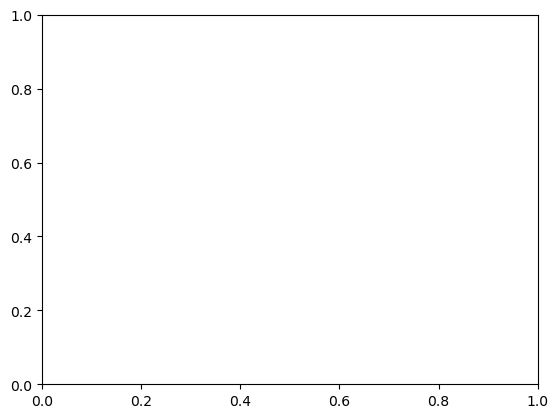

In [41]:
_=plt.subplots()

(array([  9.,  36., 108., 207., 262., 205., 115.,  51.,   6.,   1.]),
 array([-3.13445098, -2.33931241, -1.54417383, -0.74903525,  0.04610333,
         0.8412419 ,  1.63638048,  2.43151906,  3.22665764,  4.02179621,
         4.81693479]),
 <BarContainer object of 10 artists>)

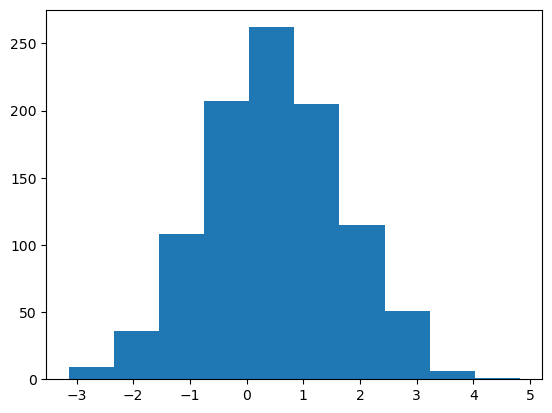

In [42]:
plt.hist(y)

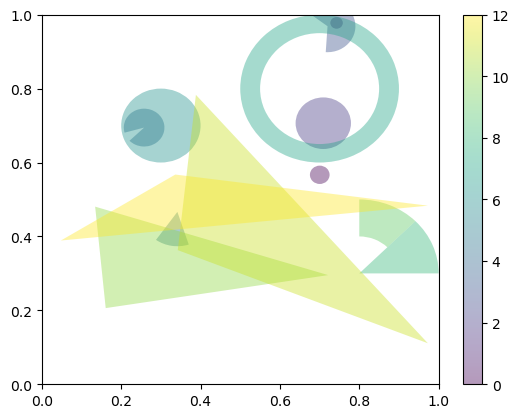

In [51]:
import numpy as np
from matplotlib.patches import Circle, Wedge, Polygon #包含绘制各种几何图形的类，如 Circle、Wedge（楔形）和 Polygon
from matplotlib.collections import PatchCollection #用于将多个图形组合成一个集合，并可以进行统一的设置。
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

resolution = 50  # the number of vertices
N = 3
x = np.random.rand(N) #它生成的数值在 0 到 1 之间，遵循均匀分布
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)

patches = []
for x1, y1, r in zip(x, y, radii):
    circle = Circle((x1, y1), r)  #创建一个圆形，中心为 (x1, y1)，半径为 r。
    patches.append(circle)

x = np.random.rand(N)
y = np.random.rand(N)
radii = 0.1*np.random.rand(N)
theta1 = 360.0*np.random.rand(N)
theta2 = 360.0*np.random.rand(N)
for x1, y1, r, t1, t2 in zip(x, y, radii, theta1, theta2):
    wedge = Wedge((x1, y1), r, t1, t2)
    patches.append(wedge)

# Some limiting conditions on Wedge
patches += [
    Wedge((.3, .7), .1, 0, 360),             # Full circle
    Wedge((.7, .8), .2, 0, 360, width=0.05),  # Full ring 环
    Wedge((.8, .3), .2, 0, 45),              # Full sector 扇形
    Wedge((.8, .3), .2, 45, 90, width=0.10),  # Ring sector 扇环
]

for i in range(N):
    polygon = Polygon(np.random.rand(N, 2), closed=True)
    patches.append(polygon)

somedata = np.arange(len(patches))  #1000*np.random.rand(len(patches)) # somedata could be any arbitrary number, for scaling the colorbar
p = PatchCollection(patches, alpha=0.4) 
p.set_array(np.array(somedata)) #将 somedata 数组映射到 p 中，指定每个图形的颜色。

ax.add_collection(p) 
plt.colorbar(p, ax=ax) #为图形添加颜色条，表示 somedata 的不同值。
 
plt.show()

In [52]:
#!pip install matplotlib --upgrade

In [53]:
somedata

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [54]:
patches

https://matplotlib.org/stable/api/collections_api.html?highlight=set_array#matplotlib.collections.PathCollection.set_array

In [55]:
sprint(p.set_array)

    def set_cmap(self, cmap):
        """
        Set the colormap for luminance data.

        Parameters
        ----------
        cmap : `.Colormap` or str or None
        """
        in_init = self.cmap is None

        self.cmap = _ensure_cmap(cmap)
        if not in_init:
            self.changed()  # Things are not set up properly yet.
<<<<<<<< END >>>>>>>>


<h2>subplots</h2>

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=subplots#matplotlib.pyplot.subplots

<class 'matplotlib.figure.Figure'> <class 'numpy.ndarray'>


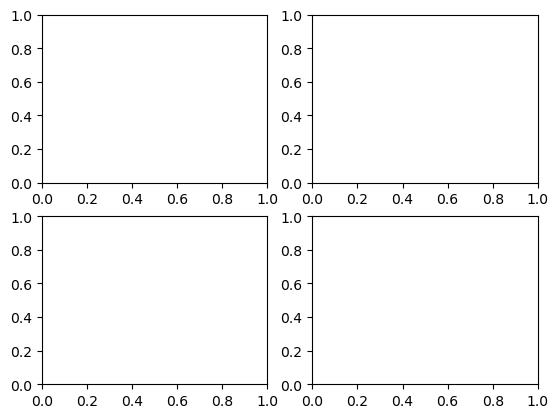

In [56]:
fig, ax = plt.subplots(2,2)
print(type(fig), type(ax))

In [57]:
type(ax)
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

Text(0.5, 1.0, 'Simple plot')

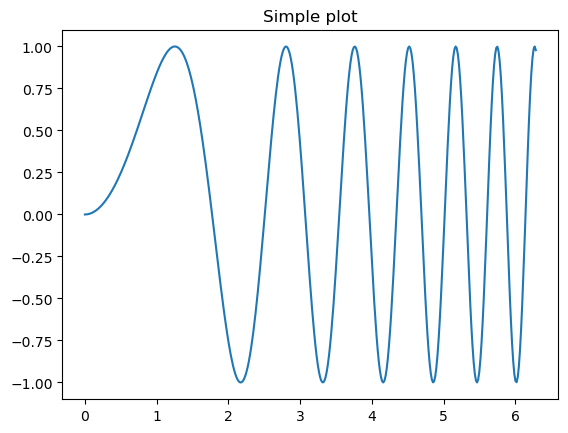

In [58]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')


Text(0.5, 0, 'X')

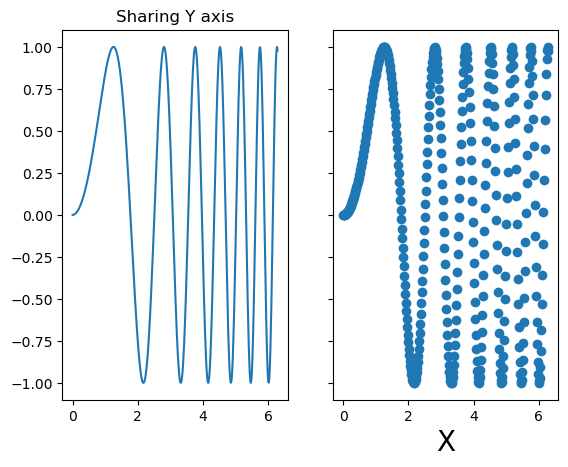

In [59]:
# Creates two subplots and unpacks the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True) #1, 2 表示绘图区域为 1 行 2 列，即包含两个子图,共享y轴刻度
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
ax2.set_xlabel('X',fontsize=20)

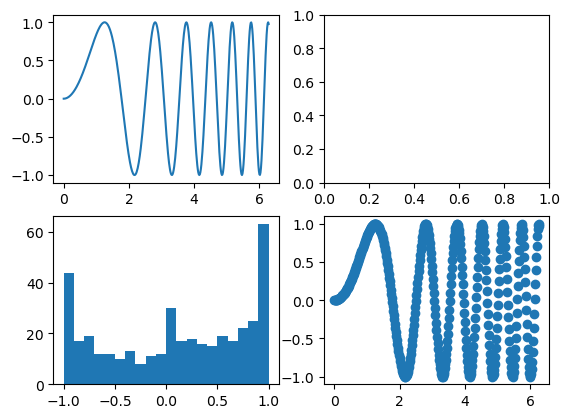

In [60]:
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, y)
axes[1,0].hist(y,bins=20)
axes[1, 1].scatter(x, y)

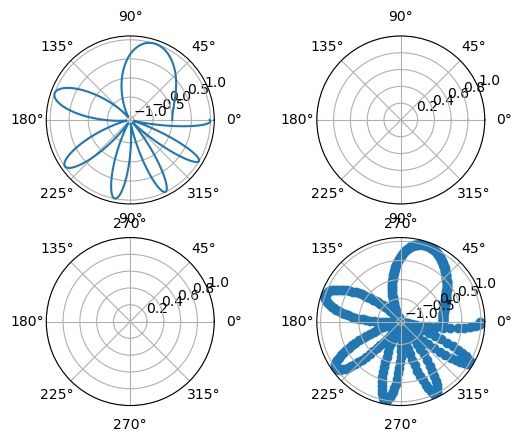

In [61]:
# Creates four polar axes, and accesses them through the returned array
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True)) #极坐标系统
axes[0, 0].plot(x, y)
axes[1, 1].scatter(x, y)

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

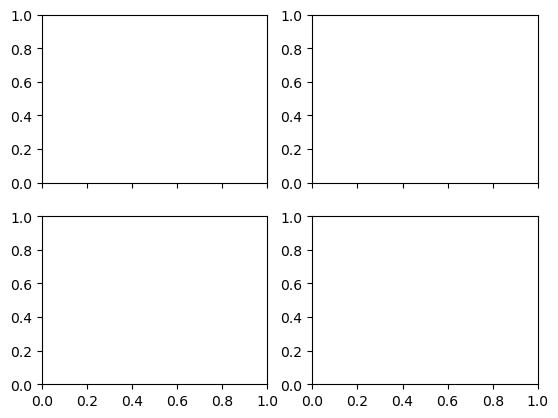

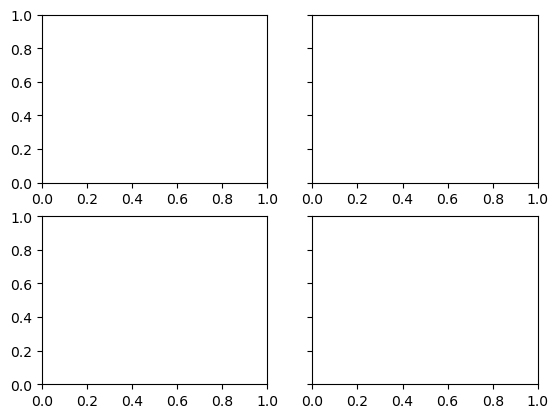

In [62]:
# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

(<Figure size 640x480 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

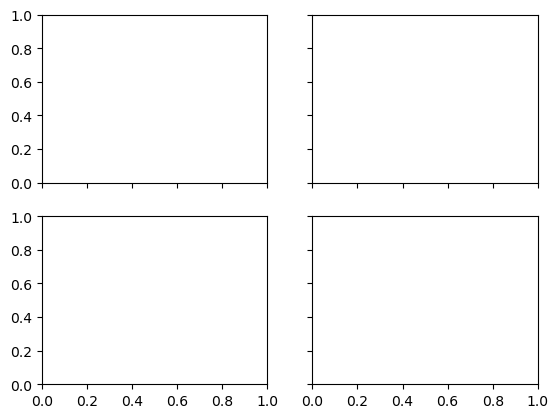

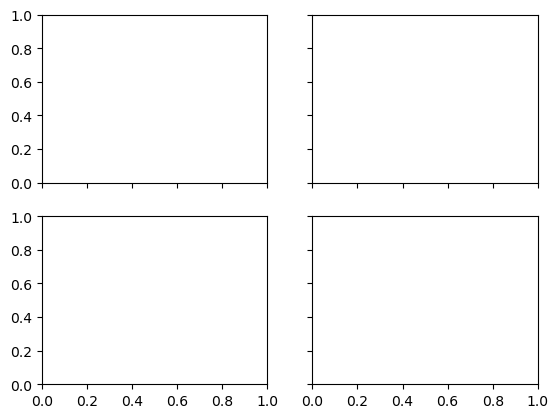

In [63]:
# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

<h2>Mathematical illustration</h2>

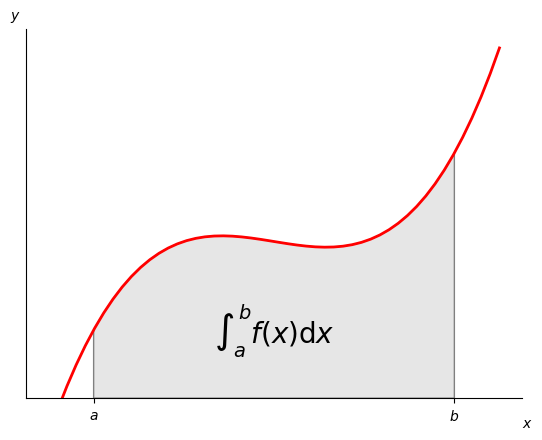

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

#### data ####
def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85

### open one subplot
fig, ax = plt.subplots()

### plot the red curve
x = np.linspace(0, 10)
y = func(x)
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Make the shaded region
a, b = 1, 9  # integral limits
ix = np.linspace(a, b)  ## an array of x 
iy = func(ix)           ## y curve 
verts = [(a, 0), *zip(ix, iy), (b, 0)]  ## 
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
#创建多边形的顶点坐标，包括积分区间的两个端点 (a, 0) 和 (b, 0) 以及曲线上的点。
#创建一个多边形对象 poly，颜色设置为浅灰色 (facecolor='0.9')，边框颜色为深灰色。
ax.add_patch(poly)

## add the laTex formular to the chart
ax.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",  
        horizontalalignment='center', fontsize=20)     
#位置为积分区间的中点 (0.5 * (a + b), 30)
#是 LaTeX 格式的积分公式，其中 r 表示原始字符串，\int_a^b 表示积分上下限，\mathrm{d}x 表示微分。
#horizontalalignment='center'：将文本水平居中。

## misc settings
ax.spines['right'].set_visible(False)  ### clear the right edge of plot area 
ax.spines['top'].set_visible(False)    ### clear the top edge of the plot area 
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))    ## manually set the ticks on x and y axises, the default setting will be over-rided
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
#ax.spines['right'].set_visible(False) 和 ax.spines['top'].set_visible(False)：隐藏右侧和顶部的边框。
#ax.xaxis.set_ticks_position('bottom')：设置 x 轴的刻度在底部。
#ax.set_xticks((a, b))  在 x 轴上仅显示积分上下限 a 和 b 的刻度
#ax.set_xticklabels(('$a$', '$b$'))：将 x 轴刻度标记为 $a$ 和 $b$，使用 LaTeX 格式。
#ax.set_yticks([])：隐藏 y 轴刻度。

fig.text(0.9, 0.05, '$x$')  ### put text on fig, which is outside of plot area
fig.text(0.1, 0.9, '$y$')   
#fig.text(0.9, 0.05, '$x$')：在图形的 (0.9, 0.05) 位置添加 x 轴标签，位于图形区域之外。
plt.show()


In [68]:
[ *zip(ix, iy)] #解包

In [70]:
verts

<h2>$\chi^2 $ Distribution</h2>

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\l'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:29: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\l'
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_62683/3262751072.py:16: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('$\chi^2$', fontsize=17)
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_62683/3262751072.py:29: SyntaxWarning: invalid escape sequence '\c'
  ax.text(0.5, 0.04, '$\chi^2_{.975} = %.2f$' % left_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_62683/3262751072

Text(6, 0.04, 'of variance')

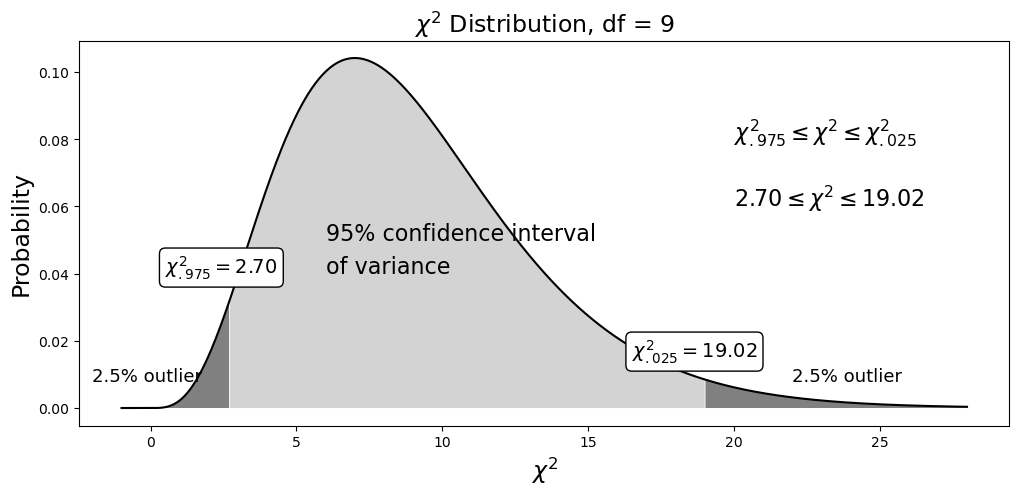

In [73]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

df = 9 #自由度
x = np.linspace(-1, 28, 1000)
y = stats.chi2.pdf(x, df, loc=0, scale=1)
right_tail = stats.chi2.ppf(1 - 0.025, df)
left_tail = stats.chi2.ppf(1 - 0.975, df)

#plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(x, y, c='black', label='Degrees of freedom = %d' % df)
ax.set_xlabel('$\chi^2$', fontsize=17)
ax.set_ylabel(r'Probability', fontsize=17)
ax.set_title(r'$\chi^2\ \mathrm{Distribution}$, df = %d' % df, fontsize=17)

# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html
ax.fill_between(x, 0, y, where=(np.array(x) > min(x)) & (np.array(x) <= left_tail), facecolor='grey')
ax.fill_between(x, 0, y, where=(np.array(x) > left_tail) & (np.array(x) < right_tail), facecolor='lightgrey')
ax.fill_between(x, 0, y, where=(np.array(x) > right_tail) & (np.array(x) <= max(x)), facecolor='grey')
ax.grid(False)
#将 x 和 y 之间的区域进行填充，从 y=0（下边界）到 y（上边界）

ax.text(22, 0.008, '2.5% outlier', fontsize=13)
ax.text(-2, 0.008, '2.5% outlier', fontsize=13) #bbox 文本环绕
ax.text(0.5, 0.04, '$\chi^2_{.975} = %.2f$' % left_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(16.5, 0.015, '$\chi^2_{.025} = %.2f$' % right_tail, fontsize=14, bbox=dict(boxstyle='round', facecolor='white'))
ax.text(20, 0.08, '$\chi^2_{.975} \leq \chi^2 \leq \chi^2_{.025}$', fontsize=16)
ax.text(20, 0.06, '$2.70 \leq \chi^2 \leq 19.02$', fontsize=16)
ax.text(6, 0.05, '95% confidence interval', fontsize=16)
ax.text(6, 0.04, 'of variance', fontsize=16)


<h3>Logarithmic scatter plot</h3>

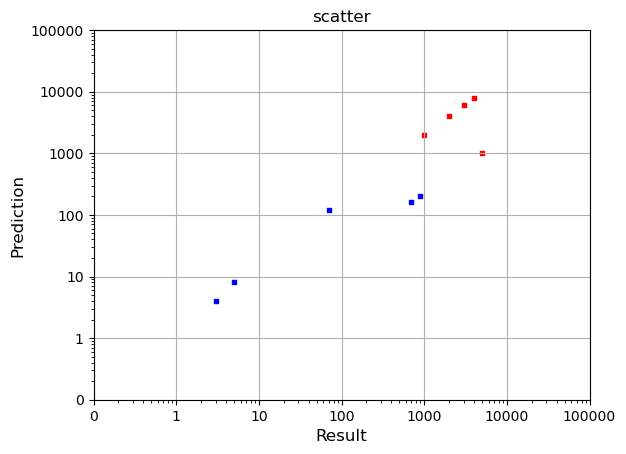

In [80]:
#from pylab import *
import matplotlib.pyplot as plt

def log_10_product(x,pos):
    return '%i' % (x)

ax = plt.subplot() # single plot area 111)
# Axis scale must be set prior to declaring the Formatter
# If it is not the Formatter will use the default log labels for ticks.
ax.set_xscale('log')
ax.set_yscale('log')

# https://www.demo2s.com/python/python-matplotlib-ticker-funcformatter-func.html
formatter = plt.FuncFormatter(log_10_product) 
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter) #一些格式化器

ax.scatter( [3, 5, 70, 700, 900], [4, 8, 120, 160, 200], s=8, c='b',  marker='s')
ax.scatter( [1000, 2000, 3000, 4000, 5000], [2000, 4000, 6000, 8000,1000], s=8, c='r', marker='s')

ax.set_xlim(1e-1, 1e5)
ax.set_ylim(1e-1, 1e5)
plt.grid(True)
plt.xlabel("Result", fontsize = 12)
plt.ylabel("Prediction", fontsize = 12)
plt.title('scatter')

plt.show()

In [79]:
def log_10_product(x, pos):
    return '%i' % (x)
print(log_10_product(11, 2.0))

11


<h3>3D charting</h3>

https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

<h3>Dynamic Chart</h3>

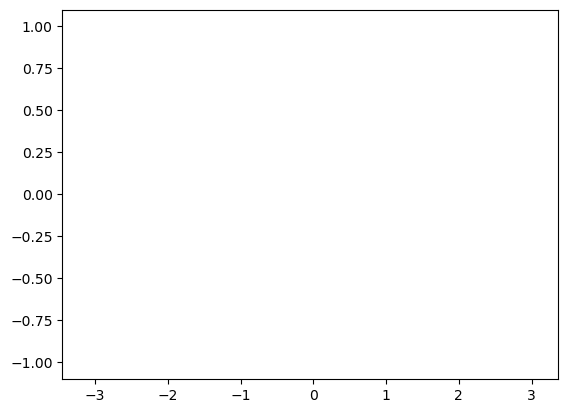

In [81]:
## gif has the ability of packing multiple images and can display the animation in its own

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
 
fig = plt.figure()
#创建新的图形：plt.figure() 创建了一个新的 Figure 对象，并使它成为当前活跃的绘图区域。之后的绘图操作（如 plt.plot()、plt.scatter() 等）都将在该图形上进行。
#返回图形对象：如果将 plt.figure() 的返回值赋给一个变量（例如 fig = plt.figure()），则可以通过该变量对图形进行进一步操作。
x = np.arange(-np.pi, np.pi, 0.1)
 
ims = []
for a in range(80):
    y = np.sin(x - a / 20 *  np.pi)
    im1, = plt.plot(x, y, "b")  # x,y are both array
    im2, = plt.plot(x[0], y[0], marker='o', color='r' ) 
    ims.append([im1, im2])

ani=animation.ArtistAnimation(fig, ims, interval=33)
ani.save('sample.gif', writer='pillow')

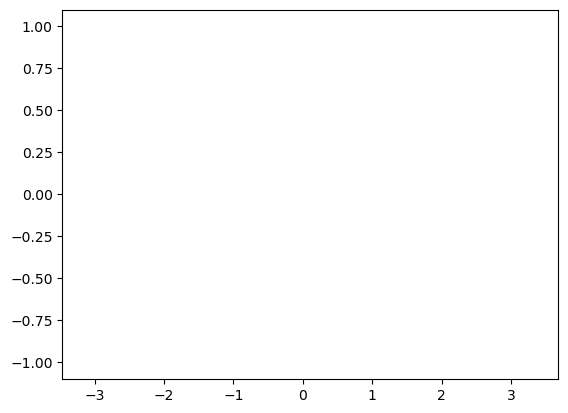

In [83]:
fig = plt.figure()
x = np.arange(-np.pi, np.pi, 0.1)
 
ims = []
for a in range(80):
    y = np.sin(x - a / 20 *  np.pi)
    im1, = plt.plot(x, y, "b")  # x,y are both array
    im2, = plt.plot(x+0.1, y, "b", alpha=0.7)  # x,y are both array
    im3, = plt.plot(x+0.2, y, "b", alpha=0.5)  # x,y are both array
    im4, = plt.plot(x+0.3, y, "b", alpha=0.3)  # x,y are both array
    im5, = plt.plot(x[0], y[0], marker='o', color='r' ) 
    ims.append([im1, im2, im3, im4, im5])

ani=animation.ArtistAnimation(fig, ims, interval=100)
ani.save('sample6.gif', writer='pillow')

<img src='sample.gif'/>

https://stackoverflow.com/questions/43445103/inline-animations-in-jupyter

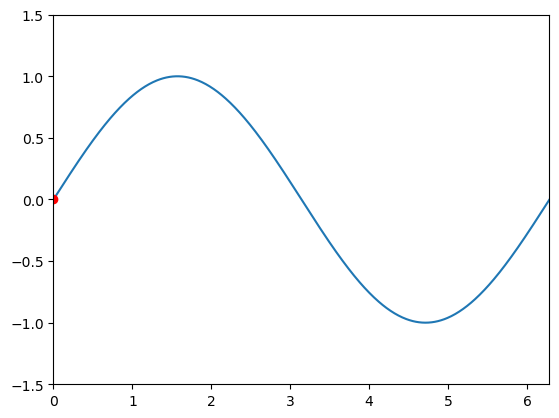

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

twoPi = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, twoPi, 0.01)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,twoPi,-1.5,1.5]) #设置绘图区域的 x 轴和 y 轴的范围。

redDot = plt.plot([0], [np.sin(0)], 'ro')[0]
# 'ro' 指定点的样式：'r' 表示红色，'o' 表示圆形标记。
# plt.plot() 返回一个包含绘图元素的列表（即 Line2D 对象），[0] 表示取列表中的第一个元素，得到单个 Line2D 对象 redDot。


/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_62683/2407056427.py:18: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  redDot.set_data(i, np.cos(i))
/var/folders/_v/z97dbq5n0msfsdk6k58jt2380000gn/T/ipykernel_62683/2407056427.py:18: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  redDot.set_data(i, np.cos(i))


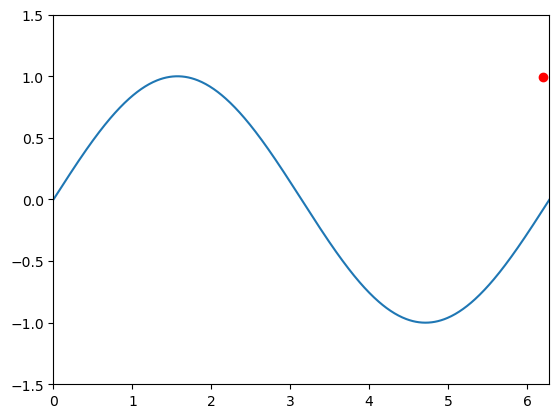

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

twoPi = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, twoPi, 0.01)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,twoPi,-1.5,1.5])

redDot = plt.plot([0], [np.sin(0)], 'ro')[0]

def ftn(i):
    redDot.set_data(i, np.cos(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, ftn, frames=np.arange(-0.0, twoPi, 0.2), \
                                      interval=100, blit=True, repeat=True)
from IPython.display import HTML
HTML(myAnimation.to_jshtml())

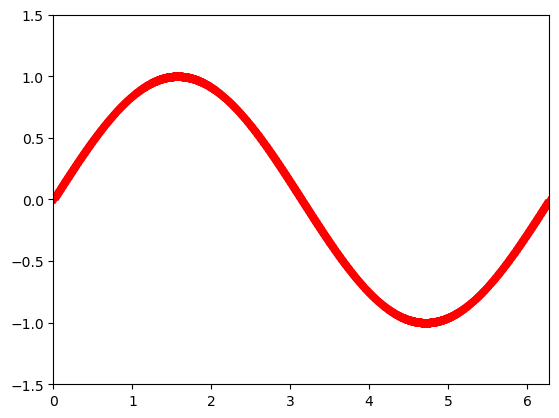

In [85]:
t = np.arange(0.0, twoPi, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,twoPi,-1.5,1.5])

redDot, = plt.plot(t,s, 'r+')

In [ ]:
help(plt.plot)